In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import sklearn.preprocessing as sk
from collections import Counter

# from matplotlib.ticker import FuncFormatter
%matplotlib inline

In [2]:
exp1_data = pd.read_csv("allTogetherSep.csv")
exp2_data = pd.read_csv("allTogetherOct.csv")

In [3]:
exp1_data_T = pd.DataFrame.transpose(exp1_data).reset_index()
exp1_data_T

,index,0,1,2,3,4,5,6,7,8,...,241,242,243,244,245,246,247,248,249,250
0,Basic information,What is your gender?,Please indicate your age,Please indicate your ethnic background (optional),What is your highest level of education?,How would you rate your technology expertise?,How do you feel about including technology in ...,How would you rate your experience with smart ...,Propensity Questions,I usually trust machines until there is a reas...,...,Earnings,trial,exp1-st1-sec1,exp1-st1-sec2,exp1-st2-sec1,exp1-st2-sec2,exp2-st1-sec1,exp2-st1-sec2,exp2-st2-sec1,exp2-st2-sec2
1,1,2,1,7,4,2,0,3,NaN,3,...,NaN,38,-450,-370,-293,174,116,220,192,228
2,2,1,1,4,4,2,1,2,NaN,4,...,NaN,58,4,118,79,119,90,249,180,231
3,3,2,1,7,4,2,1,2,NaN,4,...,NaN,39,114,120,116,135,225,155,206,228
4,4,2,1,4,4,3,1,2,NaN,4,...,NaN,NaN,-386,103,176,31,226,180,218,238
5,5,2,1,7,4,2,1,2,NaN,4,...,NaN,91,64,119,36,95,160,183,150,160
6,6,2,1,7,3,2,0,2,NaN,5,...,NaN,-96,38,90,184,136,127,69,192,123
7,7,1,1,4,4,2,1,1,NaN,4,...,NaN,NaN,-77,-42,-156,-330,-431,-300,-553,-204
8,9,1,1,4,2,2,1,2,NaN,4,...,NaN,NaN,-133,139,23,159,159,151,233,231
9,10,1,1,1,5,2,0,1,NaN,5,...,NaN,33,-458,-541,-471,-675,-749,-229,-449,-279


In [4]:
exp2_data_T = pd.DataFrame.transpose(exp2_data).reset_index()
#exp2_data_T

In [5]:
exp1_demo = exp1_data_T.values[1:19,1:8]
exp2_demo = exp2_data_T.values[1:19,1:8]
#exp_demo = np.concatenate((exp1_demo,exp2_demo),axis=0)
exp_demo = np.vstack((exp1_demo,exp2_demo)).astype(int)
exp_demo

array([[2, 1, 7, 4, 2, 0, 3],
       [1, 1, 4, 4, 2, 1, 2],
       [2, 1, 7, 4, 2, 1, 2],
       [2, 1, 4, 4, 3, 1, 2],
       [2, 1, 7, 4, 2, 1, 2],
       [2, 1, 7, 3, 2, 0, 2],
       [1, 1, 4, 4, 2, 1, 1],
       [1, 1, 4, 2, 2, 1, 2],
       [1, 1, 1, 5, 2, 0, 1],
       [2, 1, 7, 3, 2, 1, 2],
       [1, 1, 4, 2, 3, 1, 1],
       [2, 1, 3, 2, 3, 1, 3],
       [1, 1, 4, 2, 3, 1, 2],
       [1, 1, 8, 4, 2, 1, 2],
       [1, 1, 8, 3, 2, 1, 1],
       [2, 1, 4, 4, 2, 0, 2],
       [1, 1, 7, 4, 3, 1, 3],
       [2, 1, 7, 2, 2, 1, 2],
       [2, 1, 4, 4, 2, 0, 1],
       [1, 1, 7, 2, 2, 1, 2],
       [2, 1, 7, 4, 2, 1, 1],
       [2, 1, 7, 7, 2, 1, 1],
       [2, 1, 4, 3, 2, 1, 1],
       [1, 2, 6, 4, 3, 1, 1],
       [2, 1, 8, 4, 2, 1, 2],
       [2, 1, 8, 4, 2, 0, 1],
       [2, 1, 8, 7, 2, 1, 2],
       [2, 1, 8, 7, 2, 1, 1],
       [2, 1, 4, 2, 3, 0, 1],
       [2, 1, 7, 4, 2, 1, 1],
       [1, 1, 3, 4, 2, 1, 2],
       [2, 1, 3, 2, 3, 1, 2],
       [2, 1, 7, 4, 2, 1, 2],
       [1,

[1 2]


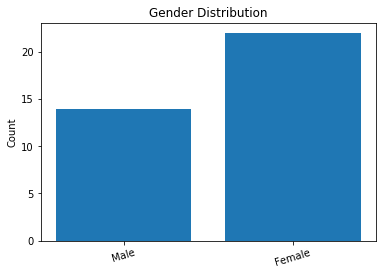

(None, Counter({1: 14, 2: 22}))

In [6]:
gender = Counter(exp_demo[:,0])
print(np.array(sorted(gender.items(), key= lambda t: (t[0]), reverse=False))[:,0])

x = np.arange(len(gender.keys()))
plt.bar(x, np.array(sorted(gender.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('Male','Female'),
           rotation=17)
plt.title("Gender Distribution")
# plt.xlabel("Value")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_demo[:,0]))

[1 2 3]


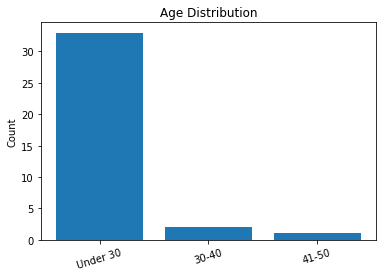

(None, Counter({1: 33, 2: 2, 3: 1}))

In [7]:
age = Counter(exp_demo[:,1])
print(np.array(sorted(age.items(), key= lambda t: (t[0]), reverse=False))[:,0])

x = np.arange(len(age.keys()))
plt.bar(x, np.array(sorted(age.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('Under 30','30-40','41-50'),
           rotation=17)
plt.title("Age Distribution")
# plt.xlabel("Value")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_demo[:,1]))

[1 3 4 6 7 8]


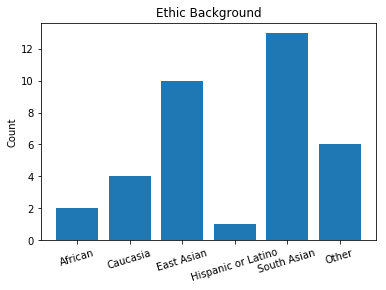

(None, Counter({1: 2, 3: 4, 4: 10, 6: 1, 7: 13, 8: 6}))

In [8]:
ethic = Counter(exp_demo[:,2])
print(np.array(sorted(ethic.items(), key= lambda t: (t[0]), reverse=False))[:,0])

x = np.arange(len(ethic.keys()))
plt.bar(x, np.array(sorted(ethic.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('African','Caucasia','East Asian','Hispanic or Latino','South Asian','Other'),
           rotation=17)
plt.title("Ethic Background")
# plt.xlabel("Value")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_demo[:,2]))

[2 3 4 5 7]


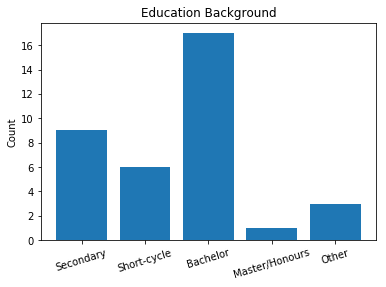

(None, Counter({2: 9, 3: 6, 4: 17, 5: 1, 7: 3}))

In [9]:
edu = Counter(exp_demo[:,3])
print(np.array(sorted(edu.items(), key= lambda t: (t[0]), reverse=False))[:,0])

x = np.arange(len(edu.keys()))
plt.bar(x, np.array(sorted(edu.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('Secondary','Short-cycle','Bachelor','Master/Honours','Other'),
           rotation=17)
plt.title("Education Background")
# plt.xlabel("Value")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_demo[:,3]))

[2 3]


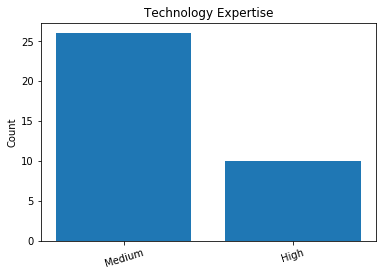

(None, Counter({2: 26, 3: 10}))

In [10]:
# technology expertise
te = Counter(exp_demo[:,4])
print(np.array(sorted(te.items(), key= lambda t: (t[0]), reverse=False))[:,0])

x = np.arange(len(te.keys()))
plt.bar(x, np.array(sorted(te.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('Medium','High'),
           rotation=17)
plt.title("Technology Expertise")
# plt.xlabel("Value")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_demo[:,4]))

[0 1]


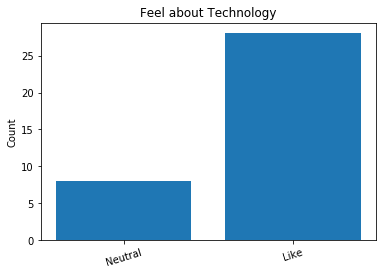

(None, Counter({0: 8, 1: 28}))

In [11]:
# Feel about technology in your life...

tl = Counter(exp_demo[:,5])
print(np.array(sorted(tl.items(), key= lambda t: (t[0]), reverse=False))[:,0])

x = np.arange(len(tl.keys()))
plt.bar(x, np.array(sorted(tl.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('Neutral','Like'),
           rotation=17)
plt.title("Feel about Technology")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_demo[:,5]))

# Trust Scores

In [12]:
exp1_trust = exp1_data_T.values[1:19,79:87].astype(int)
exp2_trust = exp2_data_T.values[1:19,79:87].astype(int)
#exp_demo = np.concatenate((exp1_demo,exp2_demo),axis=0)
exp_trust = np.vstack((exp1_trust,np.hstack((exp2_trust[:,4:],exp2_trust[:,:4])))).astype(int)
exp_trust

array([[3, 4, 5, 4, 4, 4, 4, 5],
       [4, 4, 4, 5, 3, 5, 3, 3],
       [4, 4, 4, 4, 4, 4, 5, 5],
       [2, 3, 4, 2, 4, 3, 3, 4],
       [3, 3, 2, 2, 3, 3, 3, 3],
       [2, 3, 3, 3, 3, 3, 3, 4],
       [3, 2, 2, 2, 2, 2, 4, 4],
       [4, 3, 3, 3, 4, 4, 4, 4],
       [3, 3, 2, 3, 1, 2, 2, 2],
       [3, 3, 2, 3, 3, 3, 3, 4],
       [2, 2, 3, 3, 4, 4, 4, 4],
       [4, 2, 2, 2, 4, 4, 3, 4],
       [3, 2, 2, 3, 4, 3, 3, 2],
       [3, 3, 3, 3, 3, 4, 4, 4],
       [3, 2, 2, 2, 4, 4, 4, 4],
       [4, 3, 4, 4, 4, 4, 4, 4],
       [3, 3, 3, 3, 1, 2, 3, 4],
       [2, 1, 3, 2, 2, 3, 3, 3],
       [1, 2, 2, 2, 4, 2, 3, 3],
       [3, 2, 3, 3, 3, 4, 3, 3],
       [3, 3, 3, 3, 3, 4, 4, 4],
       [1, 1, 2, 2, 3, 4, 3, 2],
       [2, 2, 3, 2, 4, 3, 4, 4],
       [2, 2, 3, 2, 2, 4, 2, 2],
       [2, 2, 3, 3, 4, 4, 4, 4],
       [3, 3, 3, 3, 4, 4, 4, 4],
       [4, 3, 3, 3, 4, 4, 4, 4],
       [4, 3, 3, 3, 3, 3, 3, 4],
       [2, 2, 3, 4, 4, 4, 4, 4],
       [2, 2, 2, 3, 3, 4, 3, 4],
       [4,

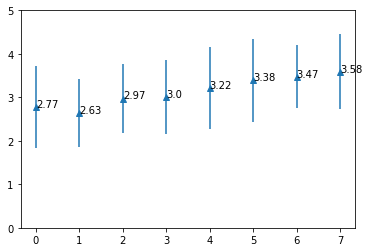

array([[ 2.77777778,  2.63888889,  2.97222222,  3.        ,  3.22222222,
         3.38888889,  3.47222222,  3.58333333],
       [ 0.94607702,  0.78714596,  0.79882244,  0.84983659,  0.94607702,
         0.95095793,  0.72595191,  0.8620067 ]])

In [13]:
# overall mean & std
x = np.arange(8)
y = np.array(exp_trust.mean(axis=0))
e = np.array(exp_trust.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([0,5])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
    
plt.show()

# overall mean & std
np.vstack((exp_trust.mean(axis=0),exp_trust.std(axis=0)))

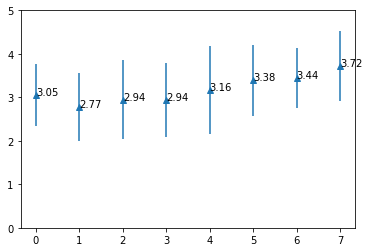

In [14]:
# exp1 mean & std
x = np.arange(8)
y = np.array(exp1_trust.mean(axis=0))
e = np.array(exp1_trust.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([0,5])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
    
plt.show()

# exp1 mean & std
exp1_trust_ms = np.vstack((exp1_trust.mean(axis=0),exp1_trust.std(axis=0)))

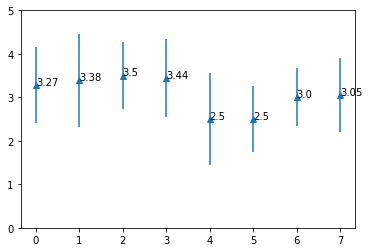

In [15]:
# exp2 mean & std
x = np.arange(8)
y = np.array(exp2_trust.mean(axis=0))
e = np.array(exp2_trust.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([0,5])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
    
plt.show()

# exp2 mean & std
exp2_trust_ms = np.vstack((exp2_trust.mean(axis=0),exp2_trust.std(axis=0)))

In [16]:
np.vstack((exp2_trust.mean(axis=0),exp2_trust.std(axis=0)))

array([[ 3.27777778,  3.38888889,  3.5       ,  3.44444444,  2.5       ,
         2.5       ,  3.        ,  3.05555556],
       [ 0.86958199,  1.0613874 ,  0.76376262,  0.89580642,  1.06718737,
         0.76376262,  0.66666667,  0.84801875]])

In [17]:
# within subject: high/low false rate

exp_trust_hifalse = exp_trust[:, np.r_[0:4]].T.ravel()
exp_trust_lofalse = exp_trust[:, np.r_[4:8]].T.ravel()

print(exp_trust_hifalse.mean(),exp_trust_hifalse.std())
print(exp_trust_lofalse.mean(),exp_trust_lofalse.std())
sp.ttest_ind(exp_trust_hifalse,exp_trust_lofalse)
#sp.ttest_ind

2.84722222222 0.860550893037
3.41666666667 0.885845484395


Ttest_indResult(statistic=-5.5137364822963626, pvalue=7.8548354045534079e-08)

In [18]:
# within subject exp1: high/low false rate

exp1_trust_hifalse = exp1_trust[:, np.r_[0:4]].T.ravel()
exp1_trust_lofalse = exp1_trust[:, np.r_[4:8]].T.ravel()

print(exp1_trust_hifalse.mean(),exp1_trust_hifalse.std())
print(exp1_trust_lofalse.mean(),exp1_trust_lofalse.std())
sp.ttest_ind(exp1_trust_hifalse,exp1_trust_lofalse)
#sp.ttest_ind

2.93055555556 0.822029819831
3.43055555556 0.86323662407


Ttest_indResult(statistic=-3.5344009712198412, pvalue=0.00055208405158460561)

In [19]:
# within subject exp2: high/low false rate

exp2_trust_hifalse = exp2_trust[:, np.r_[0:4]].T.ravel()
exp2_trust_lofalse = exp2_trust[:, np.r_[4:8]].T.ravel()

print(exp2_trust_hifalse.mean(),exp2_trust_hifalse.std())
print(exp2_trust_lofalse.mean(),exp2_trust_lofalse.std())
sp.ttest_ind(exp2_trust_hifalse,exp2_trust_lofalse)
#sp.ttest_ind

3.40277777778 0.907679003194
2.76388888889 0.889648113263


Ttest_indResult(statistic=4.2356545004344248, pvalue=4.0755659152132817e-05)

In [20]:
# within subject with/without misses

exp_trust_misses = np.hstack((exp_trust[:,0],exp_trust[:,1],exp_trust[:,4],exp_trust[:,5]))
exp_trust_nomisses = np.hstack((exp_trust[:,2],exp_trust[:,3],exp_trust[:,6],exp_trust[:,7]))

print(exp_trust_misses.mean(),exp_trust_misses.std())
print(exp_trust_nomisses.mean(),exp_trust_nomisses.std())
sp.ttest_ind(exp_trust_misses,exp_trust_nomisses)
#sp.ttest_ind

3.00694444444 0.961021792574
3.25694444444 0.855915103021


Ttest_indResult(statistic=-2.3230455611227021, pvalue=0.020878155001446051)

In [21]:
# within subject with/without misses exp1

exp1_trust_misses = np.hstack((exp1_trust[:,0],exp1_trust[:,1],exp1_trust[:,4],exp1_trust[:,5]))
exp1_trust_nomisses = np.hstack((exp1_trust[:,2],exp1_trust[:,3],exp1_trust[:,6],exp1_trust[:,7]))

print(exp1_trust_misses.mean(),exp1_trust_misses.std())
print(exp1_trust_nomisses.mean(),exp1_trust_nomisses.std())
sp.ttest_ind(exp1_trust_misses,exp1_trust_nomisses)
#sp.ttest_ind

3.09722222222 0.868583172986
3.26388888889 0.881807732186


Ttest_indResult(statistic=-1.1346070533226502, pvalue=0.25845164920781805)

In [22]:
# within subject with/without misses exp2

exp2_trust_misses = np.hstack((exp2_trust[:,0],exp2_trust[:,1],exp2_trust[:,4],exp2_trust[:,5]))
exp2_trust_nomisses = np.hstack((exp2_trust[:,2],exp2_trust[:,3],exp2_trust[:,6],exp2_trust[:,7]))

print(exp2_trust_misses.mean(),exp2_trust_misses.std())
print(exp2_trust_nomisses.mean(),exp2_trust_nomisses.std())
sp.ttest_ind(exp2_trust_misses,exp2_trust_nomisses)
#sp.ttest_ind

2.91666666667 1.03749163317
3.25 0.829156197589


Ttest_indResult(statistic=-2.1148146360572349, pvalue=0.036192406822886852)

# Num of Events Attended

In [23]:
exp1_attend = exp1_data_T.values[1:19,124:132].astype(int)
exp2_attend = exp2_data_T.values[1:19,124:132].astype(int)
# exp_demo = np.concatenate((exp1_demo,exp2_demo),axis=0)
exp_attend = np.vstack((exp1_attend,np.hstack((exp2_attend[:,4:],exp2_attend[:,:4])))).astype(int)
exp_attend

array([[ 6,  4,  6, 14, 14, 14, 14, 14],
       [15, 14, 14, 14, 14, 14, 14, 14],
       [15, 14, 14, 14, 14, 14, 14, 14],
       [ 8, 14, 14, 14, 14, 14, 14, 14],
       [15, 14, 14, 14, 14, 14, 14, 14],
       [12, 14, 14, 14, 14, 14, 14, 14],
       [ 8, 10,  7,  3,  2,  4,  0,  6],
       [ 8, 14, 14, 14, 12, 12, 14, 14],
       [15,  3, 14,  2,  2,  7,  4,  8],
       [15, 12, 14, 14, 13, 13, 14, 14],
       [15, 14, 14, 14, 14, 14, 14, 14],
       [13, 12, 14,  7, 10, 10, 14, 14],
       [14, 14, 14, 14, 14, 14, 14, 14],
       [15, 14, 14, 14, 14, 14, 14, 14],
       [ 9, 12, 14, 13, 12, 13, 14, 13],
       [15, 14, 14, 14, 14, 14, 14, 14],
       [ 4,  7,  7,  6, 14, 11, 14, 14],
       [12, 14, 14, 14, 12, 14, 14, 14],
       [15, 14, 14, 14, 14, 14, 14, 14],
       [15, 12, 14, 14, 12, 12, 14, 14],
       [12, 12, 14, 14, 13, 12, 14, 14],
       [15, 14, 14, 14, 12, 14, 14, 14],
       [15, 14, 14, 14, 14, 14, 14, 14],
       [12, 14, 14, 14, 13, 10, 14, 14],
       [15, 14, 

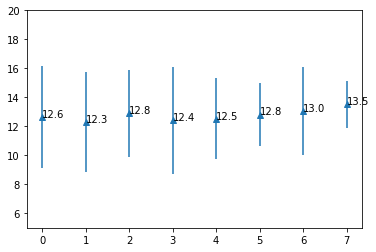

array([[ 12.63888889,  12.30555556,  12.88888889,  12.41666667,
         12.52777778,  12.80555556,  13.05555556,  13.52777778],
       [  3.5130928 ,   3.43041498,   3.02561085,   3.69966215,
          2.77374708,   2.19620183,   3.03630298,   1.62422821]])

In [24]:
# overall mean & std
x = np.arange(8)
y = np.array(exp_attend.mean(axis=0))
e = np.array(exp_attend.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([5,20])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
    
plt.show()

# overall mean & std
np.vstack((exp_attend.mean(axis=0),exp_attend.std(axis=0)))

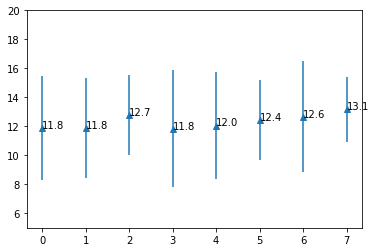

array([[ 11.88888889,  11.88888889,  12.77777778,  11.83333333,
         12.05555556,  12.44444444,  12.66666667,  13.16666667],
       [  3.60383883,   3.47832796,   2.73973956,   4.04488703,
          3.71890399,   2.75322482,   3.82970843,   2.21735578]])

In [25]:
# exp1 mean & std
x = np.arange(8)
y = np.array(exp1_attend.mean(axis=0))
e = np.array(exp1_attend.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([5,20])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
    
plt.show()

# exp1 mean & std
np.vstack((exp1_attend.mean(axis=0),exp1_attend.std(axis=0)))

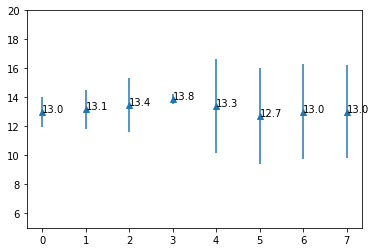

array([[ 13.        ,  13.16666667,  13.44444444,  13.88888889,
         13.38888889,  12.72222222,  13.        ,  13.        ],
       [  1.05409255,   1.34370962,   1.86256162,   0.31426968,
          3.25130553,   3.33009102,   3.2829526 ,   3.21455025]])

In [26]:
# exp2 mean & std
x = np.arange(8)
y = np.array(exp2_attend.mean(axis=0))
e = np.array(exp2_attend.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([5,20])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
    
plt.show()

# exp2 mean & std
np.vstack((exp2_attend.mean(axis=0),exp2_attend.std(axis=0)))

## t-test between high/low false alert rate

In [27]:
# within population: high/low false rate

exp_attend_hifalse = exp_attend[:, np.r_[0:4]].T.ravel()
exp_attend_lofalse = exp_attend[:, np.r_[4:8]].T.ravel()

print(exp_attend_hifalse.mean(),exp_attend_hifalse.std())
print(exp_attend_lofalse.mean(),exp_attend_lofalse.std())
sp.ttest_ind(exp_attend_hifalse,exp_attend_lofalse)
#sp.ttest_ind

12.5625 3.43333080502
12.9791666667 2.4957429032


Ttest_indResult(statistic=-1.1738744436042305, pvalue=0.24142190748307171)

## t-test between with/without missing rate

In [28]:
# within population with/without misses

exp_attend_misses = np.hstack((exp_attend[:,0],exp_attend[:,1],exp_attend[:,4],exp_attend[:,5]))
exp_attend_nomisses = np.hstack((exp_attend[:,2],exp_attend[:,3],exp_attend[:,6],exp_attend[:,7]))

print(exp_attend_misses.mean(),exp_attend_misses.std())
print(exp_attend_nomisses.mean(),exp_attend_nomisses.std())
sp.ttest_ind(exp_attend_misses,exp_attend_nomisses)
#sp.ttest_ind

12.5694444444 3.031438918
12.9722222222 2.97196260548


Ttest_indResult(statistic=-1.1345661308469714, pvalue=0.25750716423194153)

## Correlation between # Attended Events vs Trust Scores

In [29]:
# pearson correlation
sp.pearsonr(exp_trust.T.ravel(), exp_attend.T.ravel())

(0.053661374778265387, 0.36421793055144225)

In [30]:
# spearman correlation
sp.spearmanr(exp_trust.T.ravel(), exp_attend.T.ravel())

SpearmanrResult(correlation=0.052956208006881361, pvalue=0.37056437273454901)

## Correlation between # Attended False Alerts vs Trust Scores

In [31]:
exp1_attendf = exp1_data_T.values[1:19,214:222].astype(int)
exp2_attendf = exp2_data_T.values[1:19,214:222].astype(int)
# exp_demo = np.concatenate((exp1_demo,exp2_demo),axis=0)
exp_attendf = np.vstack((exp1_attendf,np.hstack((exp2_attendf[:,4:],exp2_attendf[:,:4])))).astype(int)

sp.pearsonr(exp_trust.T.ravel(), exp_attendf.T.ravel())

(-0.22259635213489382, 0.00013949885037661824)

In [32]:
exp1_attendf = exp1_data_T.values[1:19,214:222].astype(int)
exp2_attendf = exp2_data_T.values[1:19,214:222].astype(int)
# exp_demo = np.concatenate((exp1_demo,exp2_demo),axis=0)
exp_attendf = np.vstack((exp1_attendf,np.hstack((exp2_attendf[:,4:],exp2_attendf[:,:4])))).astype(int)

sp.spearmanr(exp_trust.T.ravel(), exp_attendf.T.ravel())

SpearmanrResult(correlation=-0.22350430328920187, pvalue=0.00013077412033926137)

# Num of Admin Tasks

In [33]:
exp1_admin = exp1_data_T.values[1:19,94:102].astype(int)
exp2_admin = exp2_data_T.values[1:19,94:102].astype(int)
# exp_demo = np.concatenate((exp1_demo,exp2_demo),axis=0)
exp_admin = np.vstack((exp1_admin,np.hstack((exp2_admin[:,4:],exp2_admin[:,:4])))).astype(int)
exp_admin

array([[54, 57, 53, 46, 51, 51, 49, 49],
       [52, 51, 48, 48, 50, 53, 49, 50],
       [46, 48, 46, 46, 51, 52, 48, 52],
       [49, 48, 49, 51, 54, 51, 49, 52],
       [49, 52, 49, 51, 51, 51, 47, 51],
       [50, 48, 47, 52, 54, 55, 52, 52],
       [53, 52, 52, 57, 57, 58, 59, 56],
       [46, 43, 42, 40, 51, 46, 51, 50],
       [22, 43, 44, 25, 33, 37, 24, 33],
       [47, 50, 42, 46, 52, 52, 48, 47],
       [51, 50, 47, 48, 50, 49, 49, 48],
       [49, 50, 50, 52, 54, 54, 49, 52],
       [47, 51, 47, 47, 51, 49, 49, 51],
       [46, 50, 49, 49, 51, 51, 51, 51],
       [53, 52, 48, 53, 52, 53, 48, 52],
       [51, 49, 47, 49, 51, 51, 49, 50],
       [51, 53, 51, 55, 53, 48, 52, 52],
       [47, 49, 46, 48, 56, 52, 48, 49],
       [50, 52, 46, 50, 51, 50, 48, 51],
       [45, 48, 47, 50, 46, 52, 49, 49],
       [51, 49, 46, 49, 55, 53, 52, 50],
       [52, 51, 49, 49, 55, 48, 47, 51],
       [49, 51, 47, 50, 52, 51, 48, 49],
       [52, 51, 46, 48, 54, 52, 52, 52],
       [52, 47, 

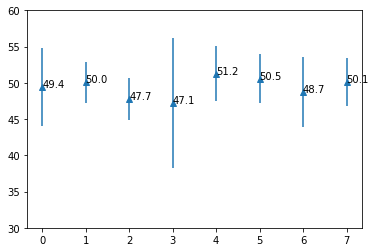

array([[ 49.44444444,  50.05555556,  47.75      ,  47.19444444,
         51.25      ,  50.55555556,  48.77777778,  50.11111111],
       [  5.34604965,   2.88621671,   2.92854723,   8.97162021,
          3.81790373,   3.40297618,   4.85404248,   3.28107179]])

In [34]:
# overall mean & std
x = np.arange(8)
y = np.array(exp_admin.mean(axis=0))
e = np.array(exp_admin.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([30,60])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
    
plt.show()

# overall mean & std
np.vstack((exp_admin.mean(axis=0),exp_admin.std(axis=0)))

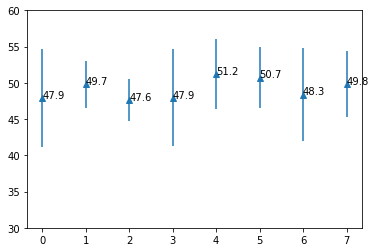

array([[ 47.94444444,  49.77777778,  47.61111111,  47.94444444,
         51.22222222,  50.72222222,  48.38888889,  49.83333333],
       [  6.77800546,   3.18948891,   2.92762492,   6.72038542,
          4.82534461,   4.22697101,   6.46476681,   4.51232879]])

In [35]:
# exp1 mean & std
x = np.arange(8)
y = np.array(exp1_admin.mean(axis=0))
e = np.array(exp1_admin.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([30,60])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
    
plt.show()

# exp1 mean & std
np.vstack((exp1_admin.mean(axis=0),exp1_admin.std(axis=0)))

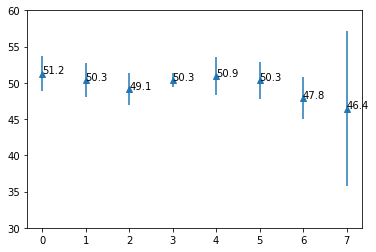

array([[ 51.27777778,  50.38888889,  49.16666667,  50.38888889,
         50.94444444,  50.33333333,  47.88888889,  46.44444444],
       [  2.42224771,   2.28859221,   2.24227067,   1.00768651,
          2.59212959,   2.51661148,   2.92287699,  10.70940512]])

In [36]:
# exp2 mean & std
x = np.arange(8)
y = np.array(exp2_admin.mean(axis=0))
e = np.array(exp2_admin.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([30,60])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
    
plt.show()

# exp2 mean & std
np.vstack((exp2_admin.mean(axis=0),exp2_admin.std(axis=0)))

## Correlation between # Attended Admins vs # Attended Events

In [37]:
# pearson correlation
sp.pearsonr(exp_trust.T.ravel(), exp_admin.T.ravel())

(0.052973688618553651, 0.37040622772042464)

In [38]:
# spearman correlation
sp.spearmanr(exp_trust.T.ravel(), exp_admin.T.ravel())

SpearmanrResult(correlation=0.043333282724592158, pvalue=0.4638413721121607)

# Earnings & Losses

In [39]:
exp1_admin_w = exp1_data_T.values[1:19,114:122].astype(int)
exp2_admin_w = exp2_data_T.values[1:19,114:122].astype(int)
# exp_demo = np.concatenate((exp1_demo,exp2_demo),axis=0)
exp_admin_w = np.vstack((exp1_admin_w,np.hstack((exp2_admin_w[:,4:],exp2_admin_w[:,:4])))).astype(int)

# correct cards:$4 
# wrong cards: $4
# use (total admin - 2x wrong admin)x$4 to get net profit
Earnings_admin = 4*(exp_admin - 2*exp_admin_w)

In [40]:
# final balance
exp1_fnl_balance = exp1_data_T.values[1:19,244:].astype(int)
exp2_fnl_balance = exp2_data_T.values[1:19,244:].astype(int)
# exp_demo = np.concatenate((exp1_demo,exp2_demo),axis=0)
exp_fnl_balance = np.vstack((exp1_fnl_balance,np.hstack((exp2_fnl_balance[:,4:],exp2_fnl_balance[:,:4])))).astype(int)

# reverse engineering to find total losses from monitoring system
Total_loss = exp_fnl_balance - Earnings_admin - 150
Total_loss

array([[-800, -732, -623, -136, -206, -110, -106,  -94],
       [-306, -196, -175, -151, -188, -113,  -86,  -95],
       [-220, -206, -210, -191, -121, -203, -136, -114],
       [-668, -183, -146, -267, -100, -118,  -80,  -80],
       [-250, -231, -302, -259, -186, -163, -180, -194],
       [-296, -244, -154, -198, -231, -277, -150, -235],
       [-423, -384, -490, -668, -785, -634, -907, -562],
       [-443, -175, -287, -151, -195, -159,  -97,  -95],
       [-680, -799, -677, -853, -951, -487, -639, -465],
       [-664, -235, -132, -114, -104, -119,  -57,  -57],
       [-272, -228, -176, -130, -119, -124,  -96, -104],
       [-242, -184, -204, -604, -251, -280,  -60,  -85],
       [-218, -216, -186, -190, -110, -170, -106,  -84],
       [-278, -178, -193, -150,  -97, -107,  -67,  -77],
       [-390, -225, -186, -240, -194,  -84,  -56, -112],
       [-282, -256, -180, -203, -153, -160, -136, -114],
       [-781, -429, -476, -584, -347, -307, -303, -267],
       [-298, -246, -140, -140,

# Propensity Questions

In [41]:
exp1_prop = exp1_data_T.values[1:19,9:15].astype(int)
exp2_prop = exp2_data_T.values[1:19,9:15].astype(int)
# exp_demo = np.concatenate((exp1_demo,exp2_demo),axis=0)
exp_prop = np.vstack((exp1_prop,np.hstack((exp2_prop[:,4:],exp2_prop[:,:4])))).astype(int)

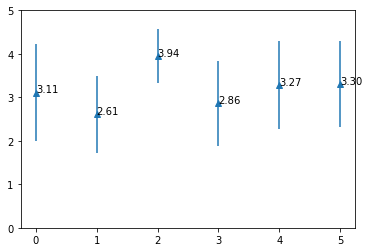

array([[ 3.11111111,  2.61111111,  3.94444444,  2.86111111,  3.27777778,
         3.30555556],
       [ 1.12491426,  0.89062331,  0.62112999,  0.97618241,  1.01683362,
         0.99497193]])

In [42]:
# overall mean & std
x = np.arange(6)
y = np.array(exp_prop.mean(axis=0))
e = np.array(exp_prop.std(axis=0))

plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([0,5])

for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
    
plt.show()

# overall mean & std
np.vstack((exp_prop.mean(axis=0),exp_prop.std(axis=0)))

# Post-stage Questions

In [43]:
# exp1_pstq = np.hstack((exp1_data_T.values[1:19,16:19],exp1_data_T.values[1:19,21:28],
#                        exp1_data_T.values[1:19,29:32],exp1_data_T.values[1:19,34:41],
#                        exp1_data_T.values[1:19,42:45],exp1_data_T.values[1:19,47:54],
#                        exp1_data_T.values[1:19,55:58],exp1_data_T.values[1:19,60:67])).astype(int)
# exp2_pstq = np.hstack((exp2_data_T.values[1:19,16:19],exp2_data_T.values[1:19,21:28],
#                        exp2_data_T.values[1:19,29:32],exp2_data_T.values[1:19,34:41],
#                        exp2_data_T.values[1:19,42:45],exp2_data_T.values[1:19,47:54],
#                        exp2_data_T.values[1:19,55:58],exp2_data_T.values[1:19,60:67])).astype(int)

exp1_pstq = exp1_data_T.values[1:19, np.r_[16:19,21:28,29:32,34:41,42:45,47:54,55:58,60:67]].astype(int)
exp2_pstq = exp2_data_T.values[1:19, np.r_[16:19,21:28,29:32,34:41,42:45,47:54,55:58,60:67]].astype(int)

# exp_demo = np.concatenate((exp1_demo,exp2_demo),axis=0)
exp_pstq = np.vstack((exp1_pstq,np.hstack((exp2_pstq[:,20:],exp2_pstq[:,:20])))).astype(int)

In [44]:
# overall mean & std
np.vstack((exp_pstq.mean(axis=0),exp_pstq.std(axis=0)))

array([[ 4.36111111,  3.19444444,  3.36111111,  3.08333333,  3.55555556,
         3.52777778,  2.97222222,  2.86111111,  2.63888889,  3.66666667,
         4.25      ,  2.94444444,  3.16666667,  3.30555556,  3.58333333,
         3.63888889,  3.27777778,  3.22222222,  2.58333333,  3.80555556,
         4.25      ,  3.13888889,  2.97222222,  3.69444444,  3.86111111,
         3.80555556,  3.44444444,  3.38888889,  2.58333333,  3.77777778,
         4.33333333,  3.19444444,  2.75      ,  3.75      ,  3.86111111,
         3.91666667,  3.58333333,  3.61111111,  2.47222222,  3.97222222],
       [ 0.8548157 ,  1.12594268,  0.6730023 ,  0.8291562 ,  0.86424162,
         0.68662262,  0.98562194,  0.97618241,  0.8548157 ,  0.62360956,
         1.01036297,  1.20056571,  0.72648316,  0.93747428,  0.98248551,
         0.8548157 ,  0.93128081,  1.03040206,  0.8291562 ,  0.77529365,
         0.98248551,  1.13413643,  0.68662262,  0.84391431,  0.78714596,
         0.84391431,  0.86424162,  0.95095793,  0.

In [45]:
# exp1 mean & std
np.vstack((exp1_pstq.mean(axis=0),exp1_pstq.std(axis=0)))

array([[ 4.27777778,  2.94444444,  3.27777778,  3.16666667,  3.55555556,
         3.61111111,  3.16666667,  2.94444444,  2.55555556,  3.77777778,
         4.        ,  2.77777778,  3.27777778,  3.22222222,  3.55555556,
         3.72222222,  3.27777778,  3.16666667,  2.77777778,  3.61111111,
         4.        ,  3.11111111,  2.77777778,  3.83333333,  4.        ,
         4.        ,  3.5       ,  3.55555556,  2.61111111,  4.        ,
         4.11111111,  3.27777778,  2.77777778,  3.77777778,  3.83333333,
         3.83333333,  3.55555556,  3.5       ,  2.55555556,  3.94444444],
       [ 0.80315735,  1.02589918,  0.65026111,  0.76376262,  0.89580642,
         0.59056366,  0.89752747,  0.84801875,  0.68493489,  0.53287017,
         1.05409255,  1.18112731,  0.73071925,  0.91624569,  1.0122704 ,
         0.86958199,  0.86958199,  0.95742711,  0.91624569,  0.95095793,
         1.24721913,  1.24225999,  0.71145825,  0.60092521,  0.66666667,
         0.57735027,  0.76376262,  0.83147942,  0.

In [46]:
# exp2 mean & std
np.vstack((exp2_pstq.mean(axis=0),exp2_pstq.std(axis=0)))

array([[ 4.5       ,  3.16666667,  3.16666667,  3.55555556,  3.72222222,
         3.61111111,  3.38888889,  3.22222222,  2.55555556,  3.55555556,
         4.55555556,  3.11111111,  2.72222222,  3.72222222,  3.88888889,
         4.        ,  3.61111111,  3.72222222,  2.38888889,  4.        ,
         4.44444444,  3.44444444,  3.44444444,  3.        ,  3.55555556,
         3.44444444,  2.77777778,  2.77777778,  2.72222222,  3.55555556,
         4.5       ,  3.11111111,  3.05555556,  3.38888889,  3.61111111,
         3.55555556,  3.27777778,  3.27777778,  2.38888889,  4.        ],
       [ 0.5       ,  1.01379376,  0.60092521,  1.0122704 ,  0.86958199,
         1.00768651,  0.95095793,  1.03040206,  0.95581392,  0.83147942,
         0.83147942,  1.14934227,  0.73071925,  0.93128081,  0.6573422 ,
         0.66666667,  0.89062331,  0.93128081,  0.67814198,  0.66666667,
         0.89580642,  1.16534316,  0.68493489,  0.8819171 ,  0.83147942,
         0.7617394 ,  1.03040206,  1.08297715,  0.

# Post-game Questions

In [47]:
exp1_pgq = exp1_data_T.values[1:19,69:76]
exp2_pgq = exp2_data_T.values[1:19,69:76]
exp_pgq = np.vstack((exp1_pgq,exp2_pgq)).astype(int)
exp_pgq

array([[4, 4, 1, 4, 2, 2, 2],
       [3, 2, 3, 2, 2, 3, 2],
       [4, 2, 2, 4, 4, 3, 2],
       [4, 4, 3, 3, 3, 3, 2],
       [5, 4, 3, 3, 4, 3, 2],
       [3, 5, 3, 4, 4, 1, 2],
       [3, 2, 3, 3, 3, 1, 2],
       [5, 1, 3, 3, 4, 2, 2],
       [3, 1, 3, 3, 4, 2, 2],
       [4, 5, 3, 3, 4, 3, 2],
       [3, 2, 2, 3, 4, 3, 2],
       [3, 4, 2, 4, 3, 3, 2],
       [4, 4, 3, 4, 3, 3, 2],
       [3, 1, 3, 2, 4, 3, 2],
       [5, 4, 3, 2, 3, 1, 2],
       [3, 2, 2, 3, 3, 3, 2],
       [4, 2, 3, 4, 4, 2, 2],
       [3, 4, 3, 2, 4, 3, 2],
       [4, 2, 3, 3, 4, 3, 2],
       [4, 2, 2, 3, 2, 3, 2],
       [3, 3, 2, 3, 4, 3, 2],
       [3, 4, 2, 4, 3, 1, 2],
       [4, 4, 3, 1, 4, 2, 2],
       [4, 5, 3, 3, 2, 1, 2],
       [4, 5, 3, 2, 4, 1, 2],
       [3, 4, 2, 3, 3, 3, 2],
       [3, 2, 2, 3, 4, 3, 2],
       [4, 5, 3, 3, 4, 1, 2],
       [3, 4, 2, 3, 4, 3, 2],
       [5, 5, 2, 4, 3, 1, 2],
       [3, 2, 2, 3, 3, 1, 2],
       [4, 4, 2, 4, 3, 3, 2],
       [3, 4, 2, 3, 4, 3, 2],
       [4,

[2 3 4 5]


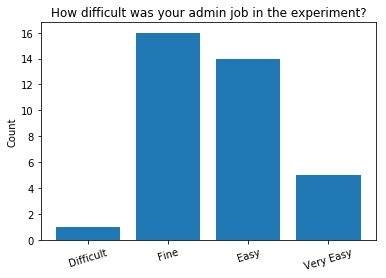

(None, Counter({2: 1, 3: 16, 4: 14, 5: 5}))

In [48]:
pg1 = Counter(exp_pgq[:,0])
print(np.array(sorted(pg1.items(), key= lambda t: (t[0]), reverse=False))[:,0])

x = np.arange(len(pg1.keys()))
plt.bar(x, np.array(sorted(pg1.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('Difficult','Fine','Easy','Very Easy'),
           rotation=17)
plt.title("How difficult was your admin job in the experiment?")
# plt.xlabel("Value")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_pgq[:,0]))

[1 2 3 4 5]


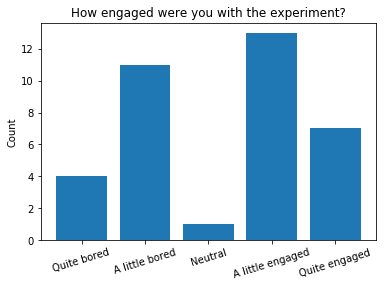

(None, Counter({1: 4, 2: 11, 3: 1, 4: 13, 5: 7}))

In [49]:
pg2 = Counter(exp_pgq[:,1])
print(np.array(sorted(pg2.items(), key= lambda t: (t[0]), reverse=False))[:,0])

x = np.arange(len(pg2.keys()))
plt.bar(x, np.array(sorted(pg2.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('Quite bored','A little bored','Neutral','A little engaged','Quite engaged'),
           rotation=17)
plt.title("How engaged were you with the experiment?")
# plt.xlabel("Value")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_pgq[:,1]))

In [50]:
pg3 = Counter(exp_pgq[:,2])
print(np.array(sorted(pg3.items(), key= lambda t: (t[0]), reverse=False))[:,0])

[1 2 3]


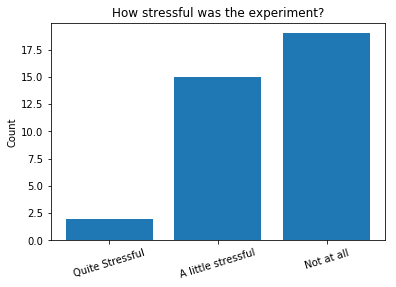

(None, Counter({1: 2, 2: 15, 3: 19}))

In [51]:
x = np.arange(len(pg3.keys()))
plt.bar(x, np.array(sorted(pg3.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('Quite Stressful','A little stressful','Not at all'),
           rotation=17)
plt.title("How stressful was the experiment?")
# plt.xlabel("Value")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_pgq[:,2]))

In [52]:
pg4 = Counter(exp_pgq[:,3])
print(np.array(sorted(pg4.items(), key= lambda t: (t[0]), reverse=False))[:,0])

[1 2 3 4]


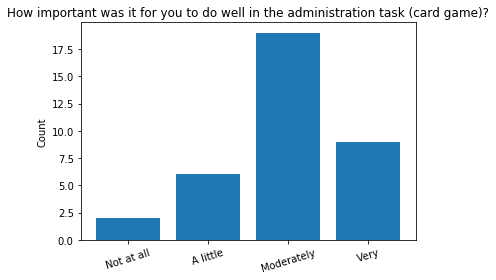

(None, Counter({1: 2, 2: 6, 3: 19, 4: 9}))

In [53]:
x = np.arange(len(pg4.keys()))
plt.bar(x, np.array(sorted(pg4.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('Not at all','A little','Moderately','Very'),
           rotation=17)
plt.title("How important was it for you to do well in the administration task (card game)?")
# plt.xlabel("Value")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_pgq[:,3]))

In [54]:
pg5 = Counter(exp_pgq[:,4])
print(np.array(sorted(pg5.items(), key= lambda t: (t[0]), reverse=False))[:,0])

[1 2 3 4]


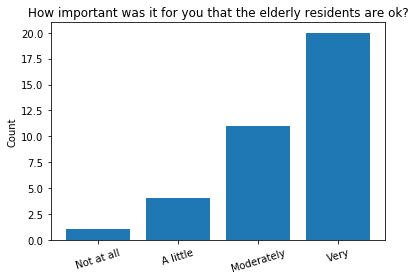

(None, Counter({1: 1, 2: 4, 3: 11, 4: 20}))

In [55]:
x = np.arange(len(pg5.keys()))
plt.bar(x, np.array(sorted(pg5.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('Not at all','A little','Moderately','Very'),
           rotation=17)
plt.title("How important was it for you that the elderly residents are ok?")
# plt.xlabel("Value")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_pgq[:,4]))

In [56]:
pg6 = Counter(exp_pgq[:,5])
print(np.array(sorted(pg6.items(), key= lambda t: (t[0]), reverse=False))[:,0])

[1 2 3]


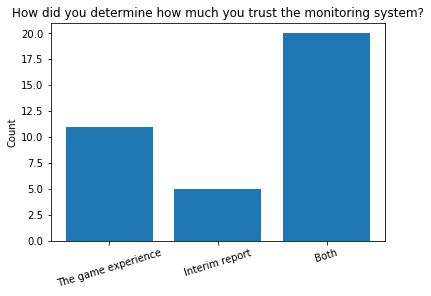

(None, Counter({1: 11, 2: 5, 3: 20}))

In [57]:
x = np.arange(len(pg6.keys()))
plt.bar(x, np.array(sorted(pg6.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('The game experience','Interim report','Both'),
           rotation=17)
plt.title("How did you determine how much you trust the monitoring system?")
# plt.xlabel("Value")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_pgq[:,5]))

In [58]:
pg7 = Counter(exp_pgq[:,6])
print(np.array(sorted(pg7.items(), key= lambda t: (t[0]), reverse=False))[:,0])

[1 2]


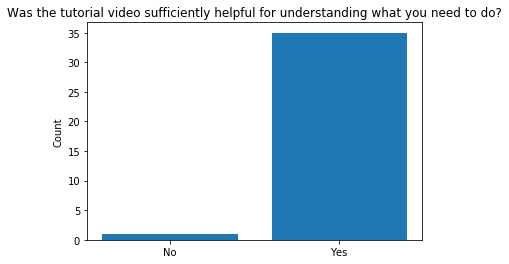

(None, Counter({1: 1, 2: 35}))

In [59]:
x = np.arange(len(pg7.keys()))
plt.bar(x, np.array(sorted(pg7.items(), key= lambda t: (t[0]), reverse=False))[:,1])
plt.xticks(x, 
           ('No','Yes'))
plt.title("Was the tutorial video sufficiently helpful for understanding what you need to do?")
# plt.xlabel("Value")
plt.ylabel("Count")

plt.show(), Counter(pd.to_numeric(exp_pgq[:,6]))